<a href="https://colab.research.google.com/github/yassine-ISAOUY/Python-for-Data-Science/blob/master/reconnaissance_contenu_violent_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***import library***

In [68]:
import keras
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from keras.layers import Dense,Convolution2D,Dropout,MaxPooling2D,BatchNormalization,Flatten
from keras.models import Sequential,Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import drive
drive.mount('/content/gdrive')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/violencePic"))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['violence', '.DS_Store', 'no violence', 'dataset', 'labels1.csv']


### ***load data and labels***

In [0]:
import numpy as np # linear algebra
from PIL import Image
import glob

def buildData(path, label, i):
  labels=[]
  images = []
  for filename in glob.glob(path):
      im=Image.open(filename)
      im.save('/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/violencePic/dataset/'+ str(i) + '.png')
      labels.append([i, label])
      i+=1
  return labels

lb = buildData("/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/violencePic/violence/*", 1, 0)
lb.extend(buildData("/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/violencePic/no violence/*", 0, len(lb)))

print(lb)

f= open("/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/violencePic/labels1.csv","w+")
for i in range(0, len(lb)):
     f.write("{}.png , {}\n".format(lb[i][0], lb[i][1]))
f.close()

[[0, 1], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 1], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [16, 1], [17, 1], [18, 1], [19, 1], [20, 1], [21, 1], [22, 1], [23, 1], [24, 1], [25, 1], [26, 1], [27, 1], [28, 1], [29, 1], [30, 1], [31, 1], [32, 1], [33, 1], [34, 1], [35, 1], [36, 1], [37, 1], [38, 1], [39, 1], [40, 1], [41, 1], [42, 1], [43, 1], [44, 1], [45, 1], [46, 1], [47, 1], [48, 1], [49, 1], [50, 1], [51, 1], [52, 1], [53, 1], [54, 1], [55, 1], [56, 1], [57, 1], [58, 1], [59, 1], [60, 1], [61, 1], [62, 1], [63, 1], [64, 1], [65, 1], [66, 1], [67, 1], [68, 1], [69, 1], [70, 1], [71, 1], [72, 1], [73, 1], [74, 1], [75, 1], [76, 1], [77, 1], [78, 1], [79, 1], [80, 1], [81, 1], [82, 1], [83, 1], [84, 1], [85, 1], [86, 1], [87, 1], [88, 1], [89, 1], [90, 1], [91, 1], [92, 1], [93, 1], [94, 1], [95, 1], [96, 1], [97, 1], [98, 1], [99, 1], [100, 1], [101, 1], [102, 1], [103, 1], [104, 1], [105, 1], [106, 1], [107, 1], [108, 1], [109, 1], [110, 1],

### ***change images to grayscale***

In [0]:
import matplotlib as plt
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2
for filename in glob.glob('/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/violencePic/dataset/*'):
  im = cv2.imread(filename)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  cv2.imwrite(filename ,im)

In [0]:
from PIL import Image
import glob

w, h = [], []
for filename in glob.glob('/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/violencePic/dataset/*'):
  im=Image.open(filename)
  width, height = im.size
  w.append(width)
  h.append(height)

print('height :',np.array(h).mean())
print('width : ',np.array(w).mean())

height : 373.4979020979021
width :  540.0706293706294


### ***crop images***

In [0]:
from PIL import Image
import glob

left = 0
top = 0
width = 540
height = 373

w, h = [], []
for filename in glob.glob('/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/violencePic/dataset/*'):
  im=Image.open(filename)
  # Crop the iceberg portion
  im.crop((left, top, left+width, top+height))
  im.save(im.filename)


### ***Resize Images***

In [0]:
from PIL import Image
import glob

IMG_SIZE = 224
for filename in glob.glob('/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/violencePic/dataset/*'):
  im=Image.open(filename)
  path = im.filename
  im = Image.fromarray(cv2.resize(np.array(im), (IMG_SIZE, IMG_SIZE)))
  im.save(path)

### ***Get Images***

In [0]:
x=[]
for filename in glob.glob('/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/violencePic/dataset/*'):
  im=Image.open(filename)
  x.append(np.array(im))
x = np.expand_dims(x,-1)
print(x.shape)

(1430, 224, 224, 1)


### ***Get Labels***

In [0]:
from numpy import genfromtxt
y = genfromtxt("/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/violencePic/labels1.csv", delimiter=',')
y = pd.get_dummies(y[:,1].astype(int)).to_numpy()
print(y)


[[0 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [1 0]]


### ***Split Data***

In [0]:

# # # Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)
print(X_train.shape)

(1144, 224, 224, 1)


### ***Building model***

In [0]:
model = Sequential()

# etap 1 - Convolution
model.add(Convolution2D(32, (3, 3), input_shape=(224, 224, 1), activation = 'relu'))
model.add(BatchNormalization())

# etap 2 - Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.2))

# ajouter une deuxième convolutional layer
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))


# ajouter une troisième convolutional layer
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 2, activation = 'sigmoid'))


NameError: ignored

In [0]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import optimizers
#Cmpiling the model
model.compile(optimizer = 'Adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.001, patience=5,verbose=1, mode='auto')
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/model3.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
model.fit(X_train, Y_train,epochs=50,validation_data=(X_test,Y_test), batch_size=30,callbacks=callbacks_list)
#model.fit_generator(X_train, Y_train,validation_data=(X_test, Y_test),nb_epoch=20, validation_split=0.2, batch_size=3,epochs=20,shuffle=False,callbacks=[clbk])

Train on 1144 samples, validate on 286 samples
Epoch 1/50
1144/1144 [==============================] - 148s 130ms/step - loss: 0.8386 - acc: 0.6442 - val_loss: 0.5531 - val_acc: 0.7517

Epoch 00001: val_acc improved from -inf to 0.75175, saving model to /content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/model3.h5
Epoch 2/50
1144/1144 [==============================] - 143s 125ms/step - loss: 0.4779 - acc: 0.7788 - val_loss: 0.6499 - val_acc: 0.7483

Epoch 00002: val_acc did not improve from 0.75175
Epoch 3/50
1144/1144 [==============================] - 143s 125ms/step - loss: 0.3048 - acc: 0.8759 - val_loss: 0.5935 - val_acc: 0.7587

Epoch 00003: val_acc improved from 0.75175 to 0.75874, saving model to /content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/model3.h5
Epoch 4/50
1144/1144 [==============================] - 144s 126ms/step - loss: 0.1711 - acc: 0.9296 - val_loss: 0.6304 - val_acc: 0.7955

Epoch 00004: val_acc improved from 0.75874 to 0.79545, sav

### ***Predictions***

In [0]:
from keras.models import load_model
from keras.layers import Lambda
import tensorflow as tf
model = load_model('/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/model2.h5')

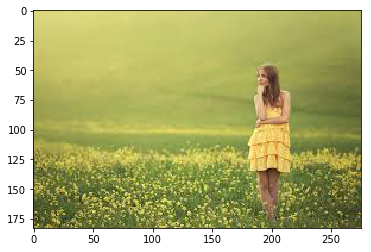

Non violence


In [76]:
left = 0
top = 0
width = 540
height = 373
img = Image.open('/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/girl.jpg')
plt.imshow(img)
plt.show()
img = img.crop((left, top, left+width, top+height))
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
img = np.expand_dims(cv2.resize(img,(224,224)), -1)
img =  np.expand_dims(img, axis=0)
predict = model.predict(img)

if (predict[0][0] > predict[0][1]):
  print("violence")
elif(predict[0][0] < predict[0][1]) :
  print("Non violence")

In [0]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model6.json","w") as json_file:
  json_file.write(model_json)
model.save_weights("model6.h5")

## ***Generating data***

In [0]:
# With data augmentation to prevent overfitting
datagen = ImageDataGenerator(
        rotation_range = 10,  # randomly rotate images in the range (degrees, -10 to 10)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
        vertical_flip = True)  # randomly flip images

datagen.fit(X_train)

In [0]:
from keras import optimizers
#Cmpiling the model
model.compile(optimizer = 'Adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.001, patience=5,verbose=1, mode='auto')
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/model2.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [earlystop,checkpoint]

In [0]:
# Fit the model
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=30),
                              epochs = 50, 
                              validation_data = (X_test, Y_test),
                              verbose = 1, 
                              steps_per_epoch=X_train.shape[0], 
                              callbacks=[earlystop, checkpoint])



Epoch 1/50
1144/1144 [==============================] - 4004s 3s/step - loss: 0.7065 - acc: 0.5773 - val_loss: 0.7919 - val_acc: 0.5717

Epoch 00001: val_acc improved from -inf to 0.57168, saving model to /content/gdrive/My Drive/Colab Notebooks/Projet Machine Learning/model2.h5
Epoch 2/50
  86/1144 [=>............................] - ETA: 1:00:54 - loss: 0.6442 - acc: 0.6231

Text(0.5, 1.0, ' Accuracy progression curve')

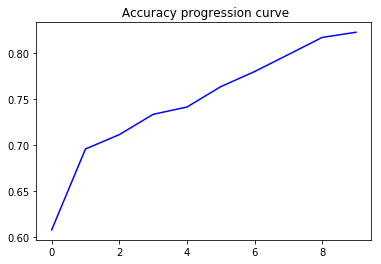

In [0]:
# Plotting the model accuracy
plt.plot(acc,color="b")
plt.title(" Accuracy progression curve")

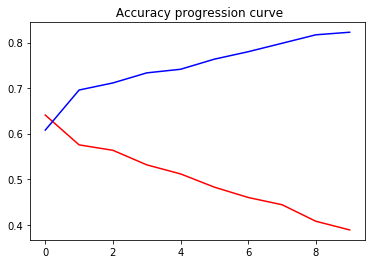

In [0]:
# Plotting the model
plt.plot(loss,color="r")
plt.title("Loss progression curve")
plt.plot(acc,color="b")
plt.title(" Accuracy progression curve")
plt.show()